In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.spatial.distance import cdist
import cv2
import sys
import pandas as pd
from IPython.display import display
from datetime import datetime

from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from photutils.aperture import ApertureStats, aperture_photometry, CircularAperture, CircularAnnulus, RectangularAperture, RectangularAnnulus
from photutils.detection import DAOStarFinder, find_peaks
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astropy.table import vstack, Table, Column
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import Angle, SkyCoord

sys.path.append('/home/finn/visual_Studio_Code/bachelorarbeit/')
from phot_used_functions import filter_sources, determine_distance, determine_shift, determine_shift_aa, determine_magnitudes, determine_fwhm
from phot_used_functions import import_images
from plotting import show_image

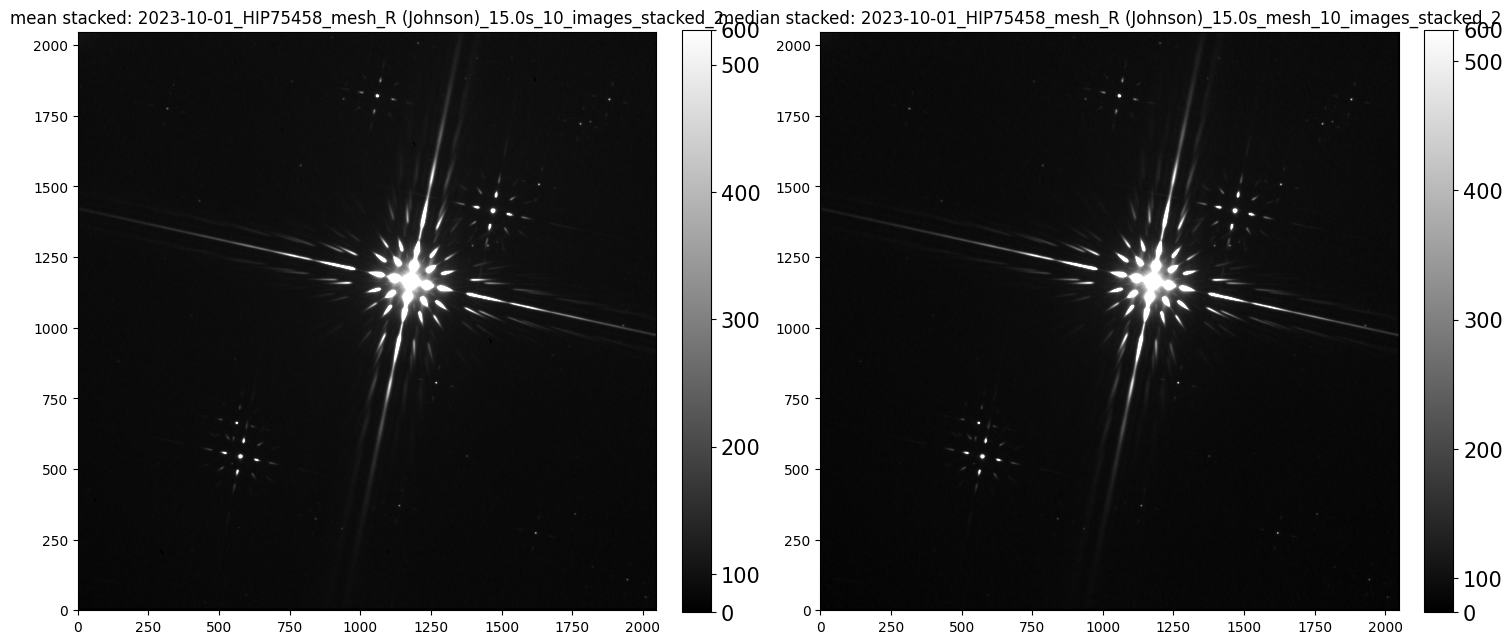

In [2]:
#path = '/home/finn/visual_Studio_Code/data/2023-09-30/stacked/lightCor_HIP75458_mesh_B (Johnson)_14.0s_10_images_stacked_0.fit'
#path_median = '/home/finn/visual_Studio_Code/data/2023-09-30/stacked_old/lightCor_HIP75458_B (Johnson)_14.0s_mesh_10_images_stacked_0.fit'
#path  ='/home/finn/visual_Studio_Code/data/2023-10-01/stacked/lightCor_HIP75458_mesh_B (Johnson)_15.0s_10_images_stacked_0.fit'
#path_median = '/home/finn/visual_Studio_Code/data/2023-10-01/stacked_old/lightCor_HIP75458_mesh_B (Johnson)_15.0s_mesh_10_images_stacked_0.fit'
#path         ='/home/finn/visual_Studio_Code/data/2023-09-26/stacked/lightCor_HIP100587_mesh_series_R (Johnson)_5.0s_10_images_stacked_0.fit'
#path_median  ='/home/finn/visual_Studio_Code/data/2023-09-26/stacked_old/lightCor_HIP100587_mesh_series_R (Johnson)_5.0s_10_images_stacked_0.fit'
#path = '/home/finn/visual_Studio_Code/data/2023-09-26/stacked/lightCor_HIP100587_mesh_series_R (Johnson)_5.0s_10_images_stacked_0.fit'
#path_median = '/home/finn/visual_Studio_Code/data/2023-09-26/stacked_old/lightCor_HIP100587_mesh_series_R (Johnson)_5.0s_10_images_stacked_0.fit'
#path = '/home/finn/visual_Studio_Code/data/2023-09-30/stacked/lightCor_HIP100587_mesh_B (Johnson)_30.0s_10_images_stacked_0.fit'
#path_median = '/home/finn/visual_Studio_Code/data/2023-09-30/stacked_old/lightCor_HIP100587_mesh_B (Johnson)_30.0s_mesh_10_images_stacked_0.fit'
#path = '/home/finn/visual_Studio_Code/data/2023-10-01/stacked/lightCor_HIP102488_mesh_B (Johnson)_2.0s_10_images_stacked_0.fit'
#path_median = '/home/finn/visual_Studio_Code/data/2023-10-01/stacked_old/lightCor_HIP102488_mesh_B (Johnson)_2.0s_10_images_stacked_0.fit'
#path = '/home/finn/visual_Studio_Code/data/2023-10-01/stacked/lightCor_HIP102488_mesh_R (Johnson)_6.0s_10_images_stacked_0.fit'
#path_median = '/home/finn/visual_Studio_Code/data/2023-10-01/stacked_old/lightCor_HIP102488_mesh_R (Johnson)_6.0s_10_images_stacked_0.fit'

#path = '/home/finn/visual_Studio_Code/data/2024-01-09/stacked/lightCor_HIP100587_ms_R_30s_R (Johnson)_30.0s_10_images_stacked_0.fit'
#path_median = '/home/finn/visual_Studio_Code/data/2024-01-09/stacked_median/lightCor_HIP100587_ms_R_30s_R (Johnson)_30.0s_10_images_stacked_0.fit'
#path = '/home/finn/visual_Studio_Code/data/2024-01-10/stacked/lightCor_HIP100587_ms_R_35s_R (Johnson)_35.0s_10_images_stacked_0.fit'
#path_median = '/home/finn/visual_Studio_Code/data/2024-01-10/stacked_median/lightCor_HIP100587_ms_R_35s_R (Johnson)_35.0s_10_images_stacked_0.fit'
#path = '/home/finn/visual_Studio_Code/data/2024-01-11/stacked/lightCor_HIP100587_ms_R_35_R (Johnson)_35.0s_10_images_stacked_0.fit'
#path_median = '/home/finn/visual_Studio_Code/data/2024-01-11/stacked_median/lightCor_HIP100587_ms_R_35_R (Johnson)_35.0s_10_images_stacked_0.fit'

#path = '/home/finn/visual_Studio_Code/data/2024-01-10/stacked/lightCor_HIP75458_ms_R_45s_R (Johnson)_45.0s_10_images_stacked_0.fit'
#path_median = '/home/finn/visual_Studio_Code/data/2024-01-10/stacked_median/lightCor_HIP75458_ms_R_45s_R (Johnson)_45.0s_10_images_stacked_0.fit'

#path = '/home/finn/visual_Studio_Code/data/2024-01-11/stacked/lightCor_HIP75458_ms_R_42s_R (Johnson)_42.0s_12_images_stacked_0.fit'
#path_median = '/home/finn/visual_Studio_Code/data/2024-01-11/stacked_median/lightCor_HIP75458_ms_R_42s_R (Johnson)_42.0s_12_images_stacked_0.fit'
#path = '/home/finn/visual_Studio_Code/data/2023-10-01/stacked/lightCor_HIP75458_mesh_R (Johnson)_15.0s_10_images_stacked_0.fit'
#path_median = '/home/finn/visual_Studio_Code/data/2023-10-01/stacked_old/lightCor_HIP75458_mesh_R (Johnson)_15.0s_mesh_10_images_stacked_0.fit'

path = '/home/finn/visual_Studio_Code/data/2023-10-01/stacked/lightCor_HIP75458_mesh_R (Johnson)_15.0s_10_images_stacked_0.fit'
path_median = '/home/finn/visual_Studio_Code/data/2023-10-01/stacked_old/lightCor_HIP75458_mesh_R (Johnson)_15.0s_mesh_10_images_stacked_0.fit'


image_list,  header_list, titles, exptime = import_images(path)
image_list_median, header_list_median, titles_median, exptime_median = import_images(path_median)

middle = len(image_list)//2
middle_image = image_list_median[middle]

w_info = WCS(header_list[0]) #use mean images wcs because i didnt solved for median yet


fig, ax = plt.subplots(1, 2, figsize=(15, 30))
show_image(image_list[middle], fig=fig, ax=ax[0])
show_image(middle_image , fig=fig, ax=ax[1])
ax[0].set_title(f'mean stacked: {titles[middle]}')
ax[1].set_title(f'median stacked: {titles_median[middle]}')
plt.tight_layout()

In [3]:
shifts = determine_shift(image_list_median, wanted_index=1) # change to 0 later !!!!!!!!!!!!!!!!!!!!!
print(shifts)

Number of images to process: 5
we use image:  1 from given list as reference image
[(3.4593537, -10.561442), (0, 0), (-2.4730241, 12.044737), (-6.1565495, 25.967632), (-8.369888, 42.17542)]


In [89]:
# 10.01 75458 B 7.5 from image 0
'''bright_positions = [(889, 1000), (1010, 1118), (1121, 1004), (1006, 890),
                    (914, 1032), (977, 1093), (1037, 1096), (1095, 1032), (1095, 975), (1035, 913), (975, 913), (916, 971),
                    (846, 1097), (912, 1156), (1114, 1167), (1169, 1108), (1173, 905), (1110, 841), (900, 842), (842, 896), 
                    (888, 1119), (1141, 1136), (1128, 885), (872, 867), (803, 1202), (1236, 1230), (1214, 802), (786, 784)]'''

# 10.01 757458 B 7.5. from image 2
'''bright_positions = [(1084, 1074), (1116, 1234), (1280, 1197), (1249, 1036),
                    (1085, 1113), (1105, 1195), (1156, 1230), (1243, 1211), (1273, 1156), (1262, 1075), (1208, 1042), (1120, 1061),
                    (988, 1136), (1002, 1219), (1175, 1329), (1260, 1306), (1375, 1136), (1356, 1057), (1185, 949), (1102, 967), 
                    (996, 1177), (1215, 1307), (1366, 1097), (1145, 966), (879, 1202), (1237, 1415), (1491, 1069), (1123, 850)]'''

#26.09 R 5s
'''bright_positions = [(853, 893), (997, 1070), (1175, 924), (1038, 745),
                    (884, 940), (960, 1031), (1043, 1038), (1135, 963), (1145, 879), (1074, 791), (991, 779), (894, 853),
                    (775, 1031), (847, 1123), (1120, 1137), (1216, 1069), (1258, 790), (1186, 700), (908, 682), (808, 748),
                    (812, 1075), (1161, 1093), (1217, 748), (869, 719), (679, 1184), (1258, 1216), (1361, 631), (765, 588)]'''

# 30.09 B 30s 100587
'''bright_positions = [(897, 981), (1017, 1095), (1131, 968), (1011, 855),
                    (925, 1010), (987, 1066), (1044, 1064), (1102, 1002), (1097, 942), (1040, 885), (982, 889), (925, 950),
                    (852, 1088), (914, 1146), (1113, 1127), (1176, 1065), (1170, 864), (1111, 806), (912, 820), (850, 882), 
                    (887, 1115), (1139, 1093), (1141, 836), (889, 858), (803, 1207), (1220, 1171), (1230, 739), (797, 770)]'''

# 10.01 B 2s 102488
'''bright_positions = [(875, 928), (909, 1087), (1069, 1049), (1038, 894),
                    (883, 966), (899, 1045), (949, 1080), (1032, 1062), (1064, 1011), (1049, 931), (998, 897), (913, 916),
                    (779, 990), (796, 1070), (966, 1176), (1046, 1151), (1162, 989), (1147, 908), (980, 806), (896, 830), 
                    (787, 1032), (1004, 1149), (1152, 950), (939, 824), (656, 1059), (1028, 1268), (1279, 923), (913, 694)]'''

# 10.01 R 5s 102488
'''bright_positions = [(837, 895), (884, 1126), (1121, 1072), (1077, 841),
                    (846, 953), (873, 1069), (945, 1110), (1060, 1085), (1109, 1017), (1088, 899), (1016, 858), (895, 880),
                    (706, 984), (724, 1102), (967, 1242), (1087, 1221), (1247, 984), (1222, 876), (986, 722), (868, 745), 
                    (711, 1042), (1025, 1212), (1241, 928), (933, 753), (552, 1078), (1058, 1366), (1421, 888), (900, 580)]'''

#09, 10 and 11.01 HIP100587
'''bright_positions = [(812, 981), (962, 1156), (1149, 1008), (998, 830),
                    (894, 989), (971, 1078), (1062, 1002), (989, 911),
                    (847, 1026), (924, 1114), (1007, 1118), (1099, 1044), (1109, 963), (1035, 874), (951, 866), (855, 943),
                    (886, 1070), (1055, 1084), (1073, 920), (903, 904),
                    (729, 1120), (810, 1204), (1099, 1226)      , (1220, 873), (1148, 784), (859, 767), (775, 842),
                    (769, 1166), (1140, 1186), (1187, 827), (807, 790), (645, 1265), (1239, 1300), (1313, 725), (711, 676)]'''

'''bright_positions = [(928, 998), (1013, 1077), (1095, 992), (1011, 911),
                    (845, 1001), (1016, 1155), (1176, 987), (1011, 830),
                    (888, 1041), (974, 1118), (1056, 1114), (1138, 1030), (1137, 948), (1052, 871), (967, 870), (886, 959),
                    (931, 1079), (1099, 1074), (1100, 904), (926, 914), 
                    (788, 1147), (871, 1229), (1163, 1215), (1237, 846), (1154, 765), (868, 780), (795, 868),
                    (828, 1189), (1194, 1162), (1196, 803), (834, 829), (711, 1310), (1307, 1266), (1305, 689), (725, 727)]'''

'''bright_positions = [(799, 977), (931, 1167), (1132, 1040), (1002, 844),
                    (882, 994), (949, 1089), (1046, 1024), (984, 929),
                    (832, 1026), (899, 1122), (980, 1136), (1078, 1070), (1094, 992), (1034, 897), (951, 878), (853, 945),
                    (866, 1075), (1033, 1107), (1067, 944), (900, 911),
                    (714, 1105), (778, 1202), (1053, 1247), (1213, 913), (1152, 818), (868, 765), (777, 832),
                    (747, 1152), (1105, 1213), (1183, 869), (828, 804), (591, 1253), (1187, 1333), (1325, 777), (741, 676)]
'''

'''theta_list = [Angle(angle-rotation, "deg") for angle in [45, 135, 45, 135,
                                                        45, 135, 45, 135,   
                                                        22.5, 157.5, 112.5, 67.5, 22.5, 157.5, 112.5, 67.5,
                                                        0, 90, 0, 90,
                                                        10,-10,100,     10,-10,100,80, #80
                                                        0, 90, 0, 90, 0, 90, 0, 90]]

w_list =    np.concatenate((45*np.ones(4), 45*np.ones(4), 55*np.ones(8), 55*np.ones(4), 120*np.ones(7), 130*np.ones(8))) #width of box (x) # ÄNDERE VORLETZTE 7 ZU 8 !!!!!!!!!!!!!!!!
h_list =    np.concatenate((15*np.ones(4), 22* np.ones(4), 25*np.ones(8), 30*np.ones(4), 30* np.ones(7),  22*np.ones(8)))#and hight of box (y)'''

# 10.01 and 11.01 HIP75458 
'''bright_positions = [(860, 923), (1014, 1092), (1196, 942), (1042, 762),
                    (898, 966), (976, 1053), (1059, 1056), (1150, 980), (1158, 898), (1081, 809), (997, 803), (903, 883),
                    (786, 1062), (865, 1146),               (1263, 804), (1196, 713), (899, 693), (812, 777), 
                    (830, 1102),       (1224, 765), (866, 748), (687, 1224), (1366, 643), (741, 609)]'''

'''theta_list = [Angle(angle-rotation, "deg") for angle in [45, 135, 45, 135,   
                                                        22.5, 157.5, 112.5, 67.5, 22.5, 157.5, 112.5, 67.5,
                                                        10,-10          ,10,-10,100,80, #100,80
                                                        0,   0, 90, 0,    0, 90] ] #90,.,.,.,90
########  configure box size here
w_list =    np.concatenate((45*np.ones(4), 50*np.ones(8), 120*np.ones(6), 135*np.ones(6))) #width of box (x)
h_list =    np.concatenate((15* np.ones(4), 25*np.ones(8), 32* np.ones(6), 22*np.ones(6)))#and hight of box (y)'''

'''bright_positions = [(838, 967), (984, 1142), (1171, 994), (1021, 812),
                    (870, 1013), (948, 1099), (1030, 1105), (1123, 1032), (1134, 950), (1058, 862), (974, 852), (881, 930),
                    (754, 1107), (833, 1194),       (1244, 860), (1174, 768), (886, 742), (786, 821),
                    (796, 1150), (1207, 815), (839, 787), (649, 1268), (1349, 701), (741, 668)]'''
'''w_list = [w+5 for w in w_list]
h_list = [h+5 for h in h_list]'''

#HIP 102488 R 6s 01.10
'''bright_positions = [(838.1, 894.5), (889.4, 1121.5), (1120.1, 1072.3), (1077.3, 842.0),
                    (910.5, 940.9), (933.7, 1054.8), (1051.3, 1029.2), (1028.1, 915.2),
                    (850.7, 952.7), (874.7, 1068.2), (945.9, 1109.7), (1061.1, 1084.5), (1106.2, 1014.9), (1087.1, 901.8), (1016.7, 858.3), (896.3, 880.6),
                    (861.7, 1010.8), (1004.5, 1100.8), (1100.9, 958.8), (956.9, 868.4),
                    (711.2, 988.8), (738.4, 1100.0), (969.8, 1242.9), (1083.2, 1224.7), (1244.2, 988.8), (1219.2, 880.0), (985.6, 734.8), (867.7, 750.7),
                    (718.0, 1045.5), (1024.2, 1222.4), (1232.8, 934.4), (928.9, 748.4), (554.7, 1081.8), (1058.2, 1381.2), (1405.2, 895.9), (899.5, 598.8)]'''


'bright_positions = [(838.1, 894.5), (889.4, 1121.5), (1120.1, 1072.3), (1077.3, 842.0),\n                    (910.5, 940.9), (933.7, 1054.8), (1051.3, 1029.2), (1028.1, 915.2),\n                    (850.7, 952.7), (874.7, 1068.2), (945.9, 1109.7), (1061.1, 1084.5), (1106.2, 1014.9), (1087.1, 901.8), (1016.7, 858.3), (896.3, 880.6),\n                    (861.7, 1010.8), (1004.5, 1100.8), (1100.9, 958.8), (956.9, 868.4),\n                    (711.2, 988.8), (738.4, 1100.0), (969.8, 1242.9), (1083.2, 1224.7), (1244.2, 988.8), (1219.2, 880.0), (985.6, 734.8), (867.7, 750.7),\n                    (718.0, 1045.5), (1024.2, 1222.4), (1232.8, 934.4), (928.9, 748.4), (554.7, 1081.8), (1058.2, 1381.2), (1405.2, 895.9), (899.5, 598.8)]'

[-10.809293160609917, -10.80723803280421, -10.798636055638623, -10.80369041423418, -10.801804214972607]
-10.804132375651907 +- 0.0037974729350529883
[-10.811802573067814, -10.8077153438969, -10.800271114068263, -10.802632811580613, -10.802373160287578]
-10.804959000580235 +- 0.004207277459409823


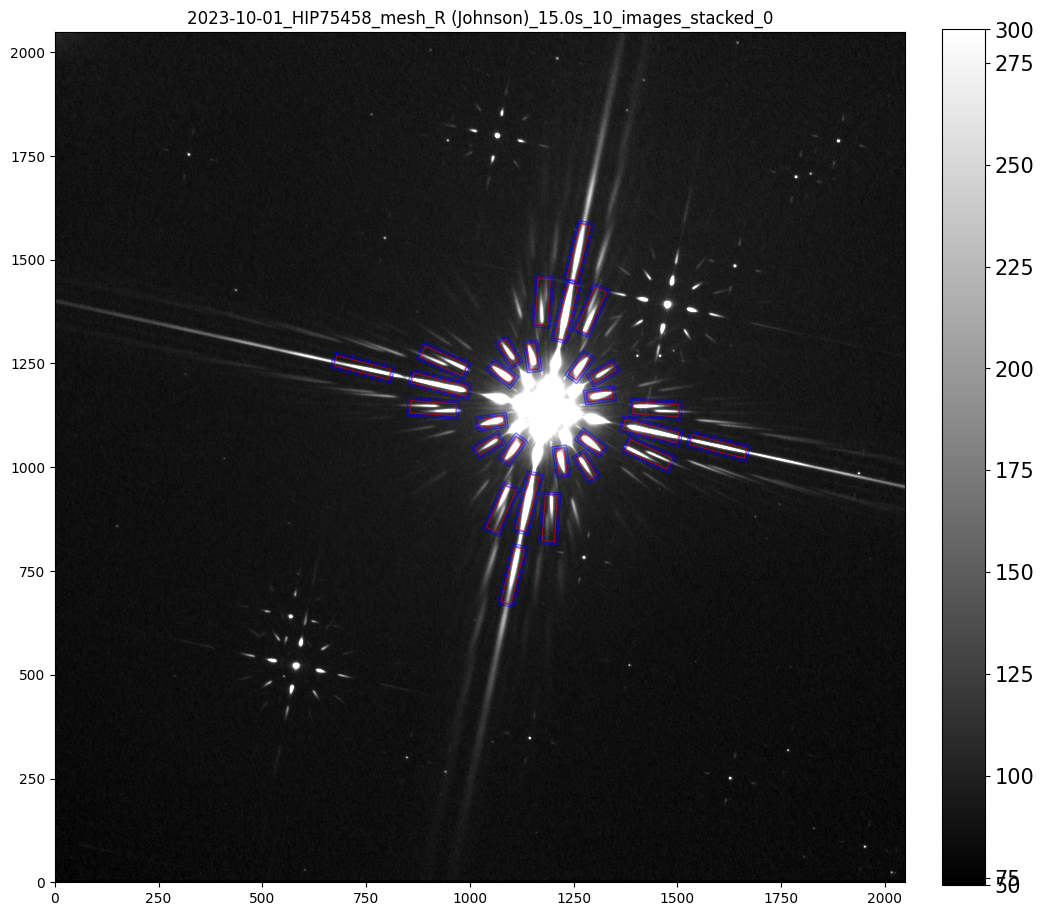

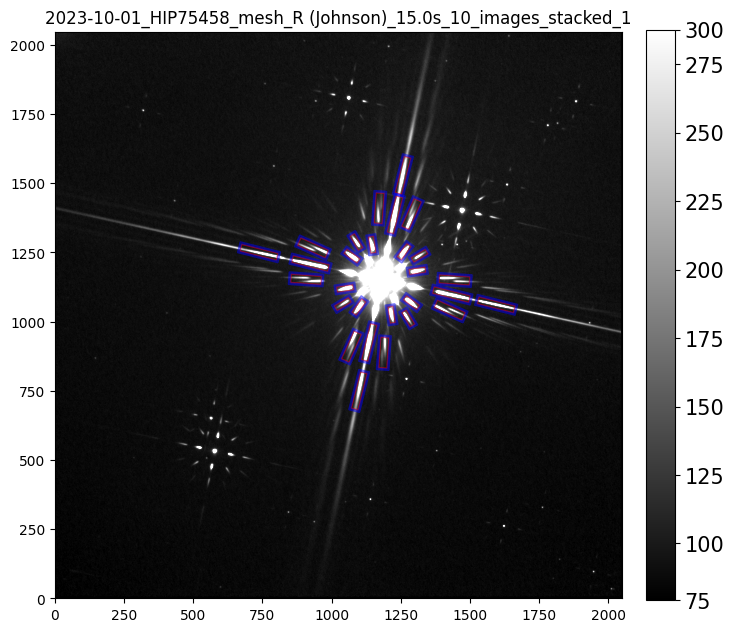

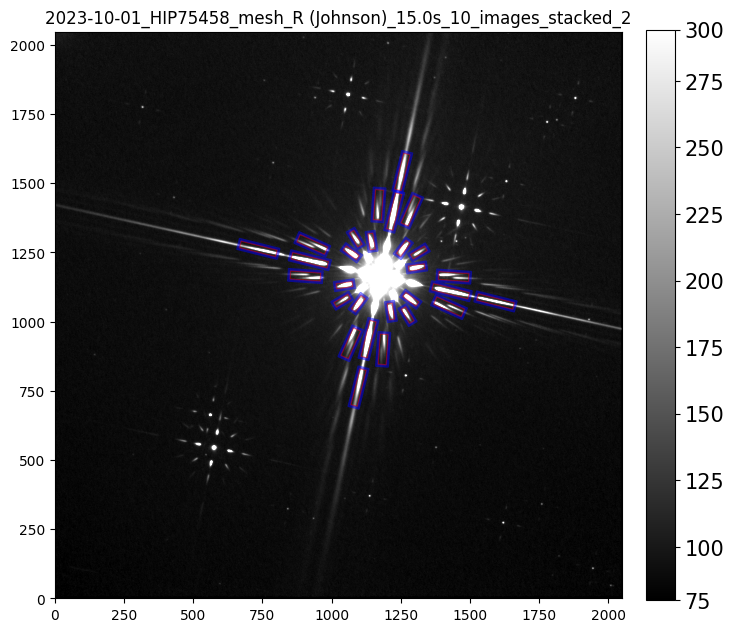

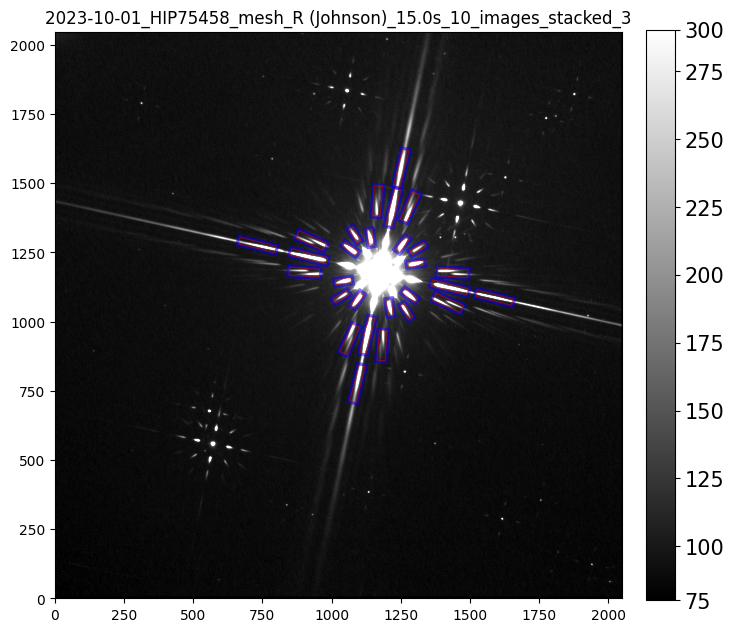

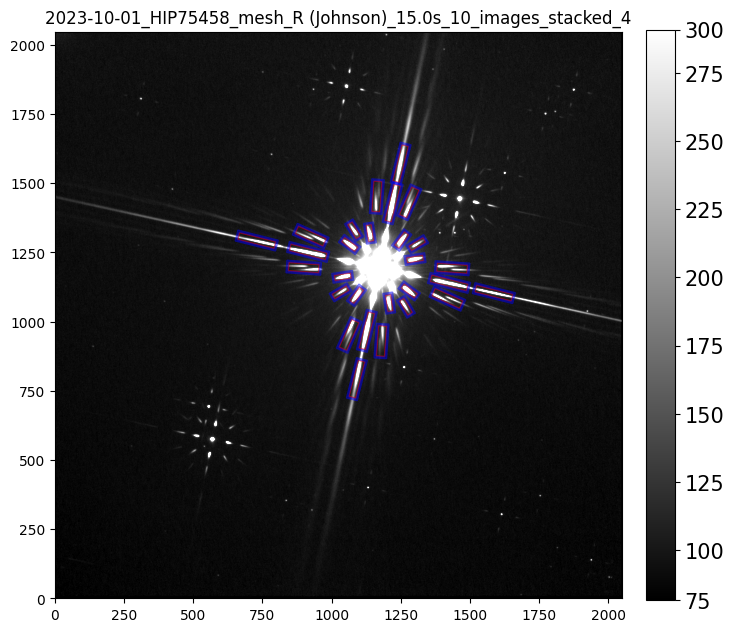

In [5]:
# use clicker.py
# define positon: corners from bottom left (bl) to ul, ur, br ;
                          #spikes next to corners, starting from above bl;
                          #outside spikes starting from bl
                          #outside spikes an very outside spike (outside l, v. outside l, o. u., v.o.u., ...)


corner_list= [(12, 1399), (1366, 2032), (2040, 957), (960, 31)]# from left to up,r,b:  important for faint stars !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

bright_positions = [(1,2), (100,10), ...]

rotation = 14 # angles are same evertime, picture is just rotated  (rot is clockwise)

theta_list = [Angle(angle-rotation, "deg") for angle in [45, 135, 45, 135, 45, 135, 45, 135,                                                                                                                 
                                                        22.5, 157.5, 112.5, 67.5, 22.5, 157.5, 112.5, 67.5, 0, 90, 0, 90,
                                                        10,-10,100,80,10,-10,100,80, 
                                                        0, 90, 0, 90, 0, 90, 0, 90]]

#w_list =    np.concatenate((45*np.ones(4), 45*np.ones(4), 55*np.ones(8), 55*np.ones(4), 125*np.ones(8), 135*np.ones(8))) #width of box (x) # ÄNDERE VORLETZTE 7 ZU 8 !!!!!!!!!!!!!!!!
#h_list =    np.concatenate((15*np.ones(4), 22* np.ones(4), 25*np.ones(8), 30*np.ones(4), 30* np.ones(8),  22*np.ones(8)))#and hight of box (y)


def get_mag_bright(imageList, plotting= False):
    magnitude_list_bright = []
    pos_br = []
    for i,image in enumerate (imageList):
        
        shifted_positions = []
        for position in bright_positions:
            tuple = np.array((position[0]+shifts[i][0], position[1]+shifts[i][1]))
            #tuple = np.array((position[0], position[1]))
            shifted_positions.append(tuple)
        pos_br.append(shifted_positions)
        apertures_bright = [RectangularAperture(position, w=w, h=h, theta=theta) for position, theta, w, h in zip(shifted_positions, theta_list, w_list, h_list)]
        annuluses_bright = [RectangularAnnulus(position, w_in=w+5, w_out=w+15, h_in=h+5, h_out=h+15, theta=theta) for position, theta, w, h in zip(shifted_positions, theta_list, w_list, h_list)]
        if plotting == True:
            if i == 0:
                fig, ax = plt.subplots(1, 1, figsize=(12, 12))
            else: 
                fig, ax = plt.subplots(1, 1, figsize=(8,8))
            show_image(image, fig=fig, ax=ax, percl=99)
            ax.set_title(titles[i])
            for aperture in apertures_bright:
                aperture.plot(color="red", lw=1.0, alpha=0.5)
            for anulus in annuluses_bright:
                anulus.plot(color="blue", lw=1.0, alpha=0.5)

        phot_table_bright = Table(names=('id', 'xcenter', 'ycenter', 'aperture_sum', 'total_bkg'), dtype=('int', 'float', 'float', 'float', 'float'))
        for i in range(len(apertures_bright)):
            aperstats = ApertureStats(image, annuluses_bright[i])
            bkg = aperstats.median
            aperture_area = apertures_bright[i].area_overlap(image)
            total_bkg = bkg * aperture_area
            phot_table = aperture_photometry(image, apertures_bright[i])
            phot_table['total_bkg'] = total_bkg
            phot_table_bright.add_row([i, phot_table['xcenter'][0], phot_table['ycenter'][0], phot_table['aperture_sum'][0], phot_table['total_bkg'][0]])

        magnitudes=[]
        for row in phot_table_bright:
            magnitude =  - (2.5 * np.log10(abs(row['aperture_sum'] - row['total_bkg']) / exptime))
            magnitudes.append(magnitude)
        magnitude_list_bright.append(magnitudes)
        phot_table_bright['magnitude'] = magnitudes
        #phot_table_bright['magnitude'] = magnitude_bright
        #phot_table_bright.pprint(max_lines = -1, max_width = -1)
    mean_magnitude_list_bright = [np.mean(mag) for mag in magnitude_list_bright]
    print(mean_magnitude_list_bright)
    print(np.mean(mean_magnitude_list_bright),"+-", np.std(mean_magnitude_list_bright))
    return pos_br, magnitude_list_bright, mean_magnitude_list_bright

pos_br_mean, mag_br_mean, mean_mag_br_mean = get_mag_bright(image_list, plotting = False)
pos_br_median, mag_br_median, mean_mag_br_median = get_mag_bright(image_list_median, plotting = True)

In [6]:
shifts_ft = determine_shift(image_list_median, wanted_index=0)

Number of images to process: 5
we use image:  0 from given list as reference image


61
[-7.70216835176089, -7.694568066382804, -7.678503791403224, -7.686259839388382, -7.6904838344971465]
0.007931387844276392
[-7.705204202278484, -7.694664118990961, -7.681984261516886, -7.6820400907741835, -7.692560047654237]
0.00870356608496435


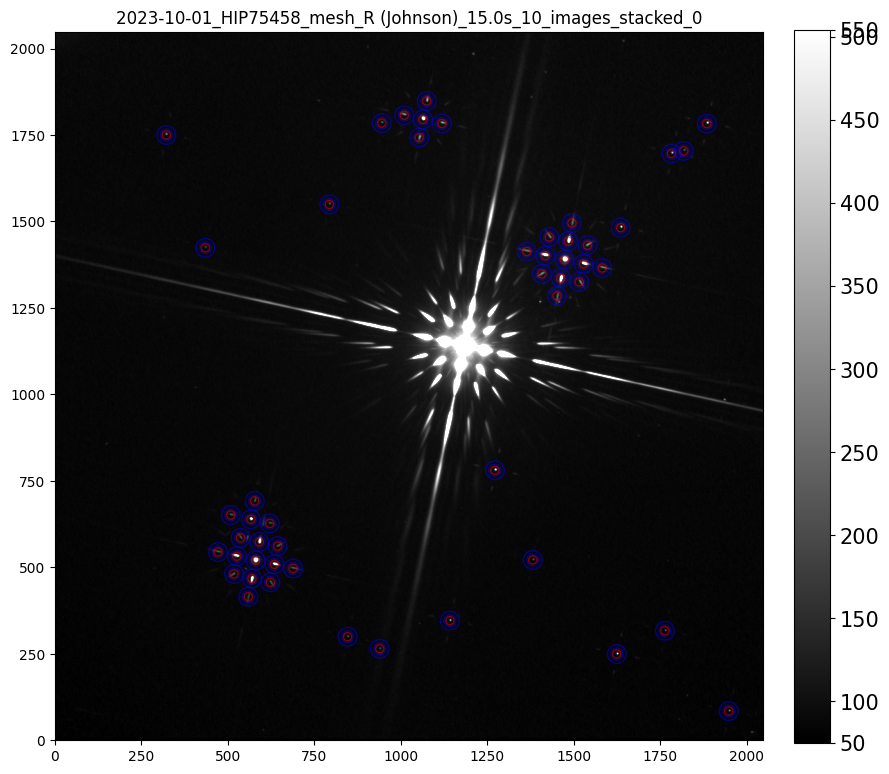

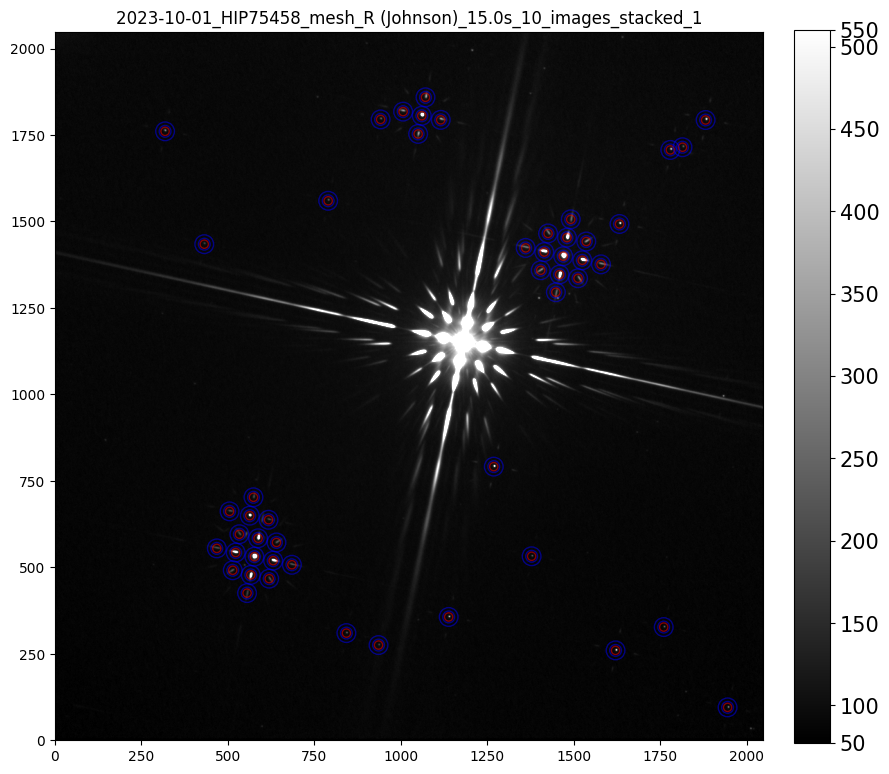

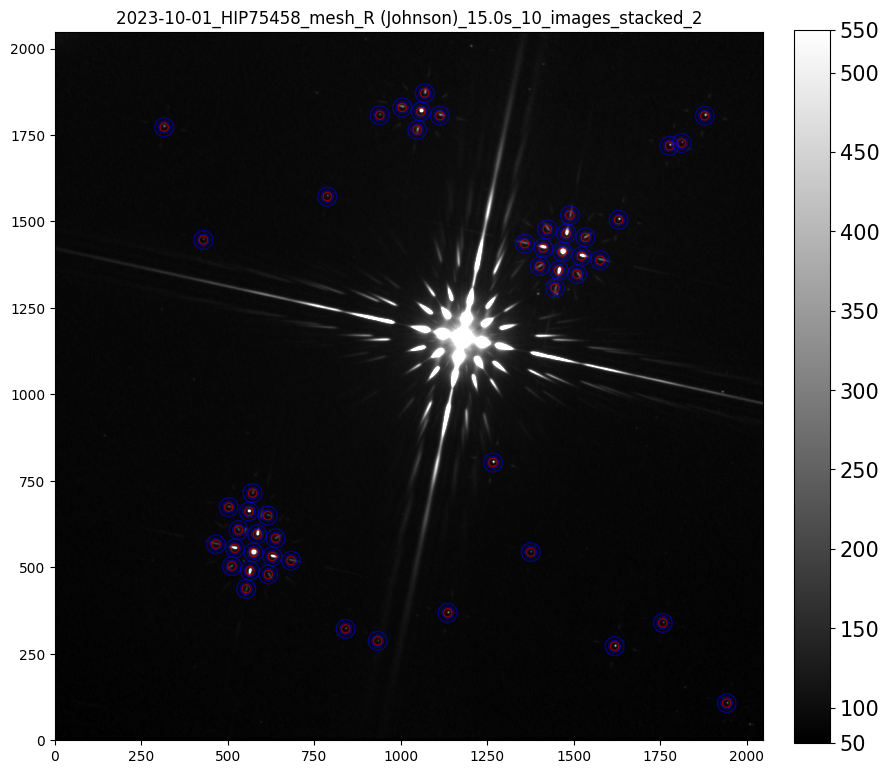

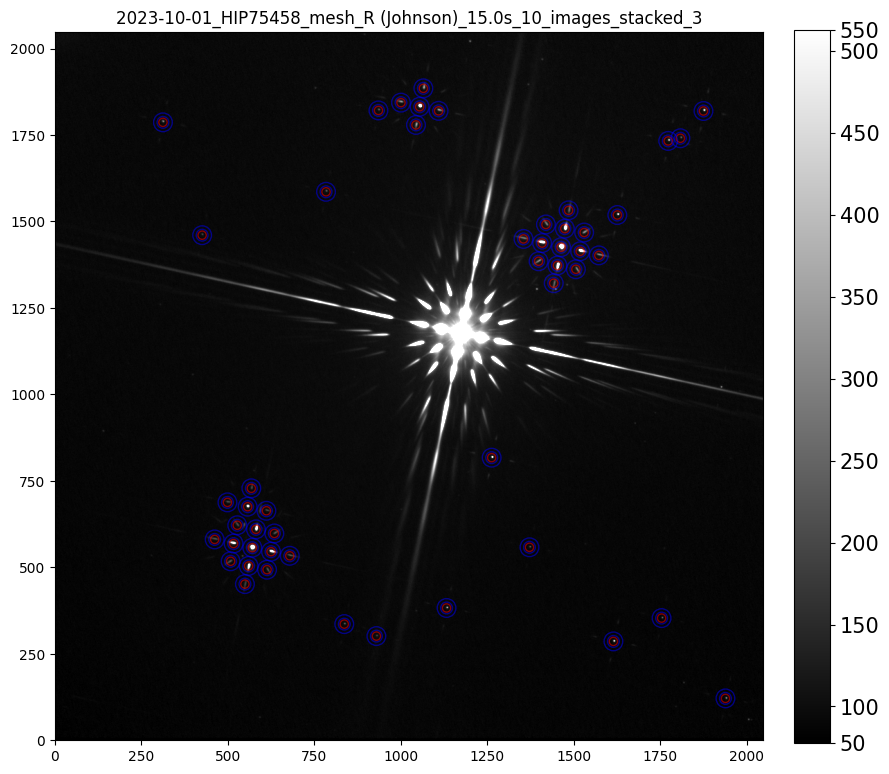

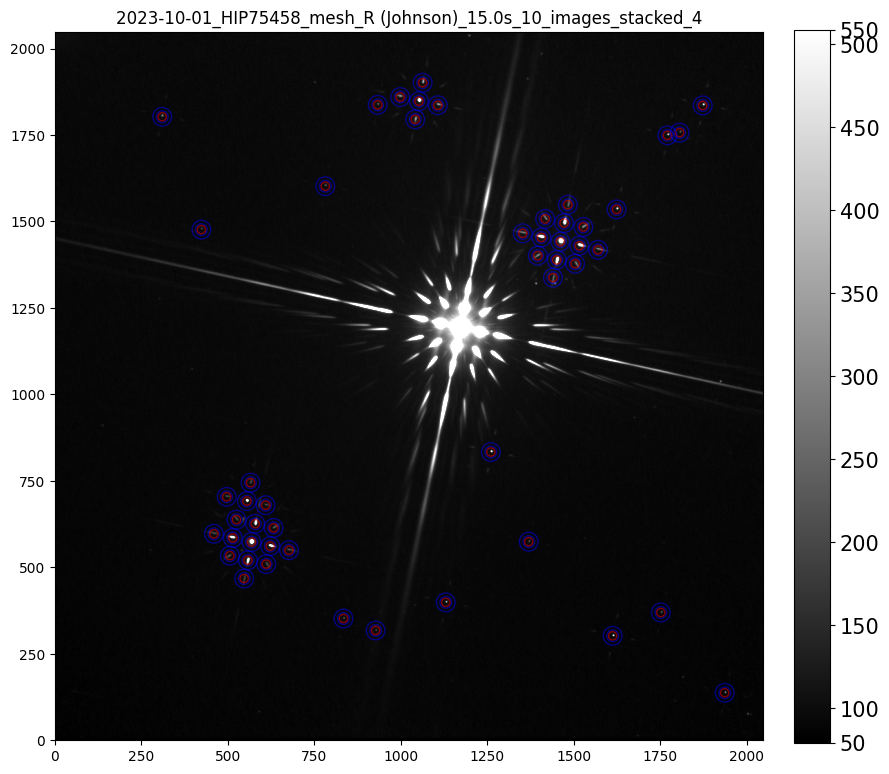

In [7]:
r_ft=12   #change here !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
top_n=50 #change number of stars here (count from brightest) !!!!!!!!!!!!!!!!!!!!!


# mask circle around center of target star
mask2 = np.zeros(image_list[0].shape, dtype=bool)
center = np.mean(pos_br_median[0][:4], axis=0)#mean of all spikes should be the center
y, x = np.ogrid[:image_list[0].shape[1], :image_list[0].shape[0]]
circle_mask = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2) <= (300)
mask2[circle_mask] = True

# to remove individual spikes
circle_mask2 = np.sqrt((x - 1600) ** 2 + (y - 1000) ** 2) <= (200)
mask2[circle_mask2] = True

#mask the spikes as triangles
def get_mask(triangle_corners):
    triangle_corners[:, [0, 1]] = triangle_corners[:, [1, 0]] #positions in y,x instead of x,y in programming
    y, x = np.ogrid[:image_list[0].shape[1], :image_list[0].shape[0]][::-1] #same here
    triangle_mask = ((x - triangle_corners[0, 0]) * (triangle_corners[1, 1] - triangle_corners[0, 1]) - (y - triangle_corners[0, 1]) * (triangle_corners[1, 0] - triangle_corners[0, 0]) > 0) & \
                    ((x - triangle_corners[1, 0]) * (triangle_corners[2, 1] - triangle_corners[1, 1]) - (y - triangle_corners[1, 1]) * (triangle_corners[2, 0] - triangle_corners[1, 0]) > 0) & \
                    ((x - triangle_corners[2, 0]) * (triangle_corners[0, 1] - triangle_corners[2, 1]) - (y - triangle_corners[2, 1]) * (triangle_corners[0, 0] - triangle_corners[2, 0]) > 0)
    return triangle_mask
for i in range (len(corner_list)): # take corner and the 4 corner spikes
    triangle_corners = np.array([corner_list[i], bright_positions[i], bright_positions[(i+1) % len(corner_list)]]) # % = modulo -> just says that the last corner equals the 0th
    triangle_mask = get_mask(triangle_corners)
    mask2[triangle_mask] = True


#detect ref stars in first image
mean, median, std = sigma_clipped_stats(image_list_median[0], sigma=3.0)
daofind_faint = DAOStarFinder(fwhm=3.0, threshold=4.0*std, roundlo=-5.0, roundhi=5.0)
sources_faint = daofind_faint(image_list_median[0], mask=mask2)
sources_faint.sort(['xcentroid', 'ycentroid'])
positions_faint = np.transpose((sources_faint['xcentroid'], sources_faint['ycentroid']))
positions_faint,sources_faint = filter_sources(positions_faint, sources_faint, min_separation=30, min_edge_distance=r_ft) #exclude multiple detections of star, min edge dist not relevant since we will shift pos

#filter pos which are too close to the ege
edge = 30
valid_positions = [pos for pos in positions_faint if all(edge < pos[0] + shift[-1] < 2048 - edge and edge < pos[1] + shift[-1] < 2048 - edge for shift in shifts_ft)]
print(len(valid_positions))

def get_mag_faint(input_list, plotting = False):
    magnitude_list_faint, positions_faint = [],[]

    for i,image in enumerate (input_list):
        
        shifted_positions = []
        if i == 0:
            for position in valid_positions:
                tuple = np.array((position[0]+shifts_ft[i][0], position[1]+shifts_ft[i][1]))
                shifted_positions.append(tuple)
        else:
            for position in positions_faint[0]: # because we choose top_n in first image we need to stick to thoose positons, otherwise we would determine top_n new in everimage -> usage of different ref stars
                tuple = np.array((position[0]+shifts_ft[i][0], position[1]+shifts_ft[i][1]))
                shifted_positions.append(tuple)


        apertures_faint = [CircularAperture(position, r=r_ft) for position in shifted_positions]
        annulus_apertures_faint = [CircularAnnulus(position,r_in=r_ft+5, r_out=r_ft+15) for position in shifted_positions]
        
        # Initialize an empty table to store the photometry results
        phot_table_faint = Table(names=('id', 'xcenter', 'ycenter', 'aperture_sum', 'total_bkg'), dtype=('int', 'float', 'float', 'float', 'float'))
        for j in range(len(apertures_faint)):
            aperstats = ApertureStats(image, annulus_apertures_faint[j])
            bkg = aperstats.median
            aperture_area = apertures_faint[j].area_overlap(image)
            total_bkg = bkg * aperture_area
            phot_table = aperture_photometry(image, apertures_faint[j])
            phot_table['total_bkg'] = total_bkg
            phot_table_faint.add_row([j, phot_table['xcenter'][0], phot_table['ycenter'][0], phot_table['aperture_sum'][0], phot_table['total_bkg'][0]])
        #phot_table_faint.pprint(max_lines = -1, max_width = -1)

        magnitudes=[]
        for row in phot_table_faint:
            magnitude =  - (2.5 * np.log10(abs(row['aperture_sum'] - row['total_bkg']) / exptime))
            magnitudes.append(magnitude)
        

        sorted_indices = np.argsort(magnitudes)[:top_n]
        top_n_magnitudes = [magnitudes[idx] for idx in sorted_indices]
        top_n_positions = [shifted_positions[idx] for idx in sorted_indices]
        apertures_faint = [apertures_faint[idx] for idx in sorted_indices]
        annulus_apertures_faint = [annulus_apertures_faint[idx] for idx in sorted_indices]
        
        magnitude_list_faint.append(top_n_magnitudes)
        #print(len(top_n_positions))
        positions_faint.append(top_n_positions)

        if plotting == True:
            if i == 0:
                fig, ax = plt.subplots(1, 1, figsize=(10, 10))
            else:
                fig, ax = plt.subplots(1,1, figsize=(10,10))
            show_image(image, fig=fig, ax=ax)
            ax.set_title(titles[i])
            for aperture in apertures_faint:
                aperture.plot(color="red", lw=1.0, alpha=0.5)
            for anulus in annulus_apertures_faint:
                anulus.plot(color="blue", lw=1.0, alpha=0.5)

    mean_faint_magnitudes_list = [np.mean(mag) for mag in magnitude_list_faint] #mean of all refernce stars
    print(mean_faint_magnitudes_list)
    print(np.std(mean_faint_magnitudes_list))
    return positions_faint, magnitude_list_faint, mean_faint_magnitudes_list

pos_ft_mean,    mag_ft_mean,    mean_mag_ft_mean    = get_mag_faint(image_list, plotting = False) # (much faster without plotting)
pos_ft_median,  mag_ft_median,  mean_mag_ft_median  = get_mag_faint(image_list_median, plotting = True)


# Diff Phot


In [8]:
def print_results(magnitude_list_bright,mean_faint_magnitudes_list):
  diff_magnitude_list = []
  #print("index  bright mag        faint mag         diff mag")
  for index in range (len(magnitude_list_bright)):
    diff_magnitude= magnitude_list_bright[index] - mean_faint_magnitudes_list [index]
    #print(index,  magnitude_list_bright[index] , mean_faint_magnitudes_list [index], diff_magnitude)
    diff_magnitude_list.append(diff_magnitude)
  print(f"The differential Magnitude is: M = ${round(np.mean(diff_magnitude_list), 4)}\pm{round(np.std(diff_magnitude_list), 4)}$")
  print(f"Value for bright star: {round(np.mean(magnitude_list_bright),4)}+-{round(np.std(magnitude_list_bright),4)}")
  print(f"Value for faint stars: {round(np.mean(mean_faint_magnitudes_list),4)}+-{round(np.std(mean_faint_magnitudes_list),4)}")
  
print('for mean:')
print_results(mean_mag_br_mean,  mean_mag_ft_mean)
print('')
print('for median:')
print_results(mean_mag_br_median,  mean_mag_ft_median)


for mean:
The differential Magnitude is: M = $-3.1137\pm0.0046$
Value for bright star: -10.8041+-0.0038
Value for faint stars: -7.6904+-0.0079

for median:
The differential Magnitude is: M = $-3.1137\pm0.0052$
Value for bright star: -10.805+-0.0042
Value for faint stars: -7.6913+-0.0087


In [135]:
print('')
print(f'rot={rotation} ; r_ft={r_ft} ; corner list={corner_list}, top_n={top_n}')


rot=41 ; r_ft=13 ; corner list=[(144, 1678), (1543, 1621), (2037, 145), (504, 385)], top_n=40


# Save positons

In [136]:
output_path = path[:46] + 'results'
if not os.path.exists(output_path):
    os.makedirs(output_path)

time_list =[]
for i in range (len(header_list)):
    print(header_list[i]['DATE-OBS'])
    time_list.append(header_list[i]['DATE-OBS'])

file_name = f'time_list_{header_list[0]["DATE-OBS"][:10]}_ms_{header_list[0]["OBJECT"]}_{header_list[0]["FILTER"]}_{exptime}s.txt'
file_path = os.path.join(output_path, file_name) 
with open(file_path, 'w') as file:
    for item in time_list:
        file.write(f"{item}\n")

2024-01-11T23:27:10
2024-01-11T23:37:05
2024-01-11T23:46:59
2024-01-11T23:56:54
2024-01-12T00:06:49
2024-01-12T00:16:43
2024-01-12T00:26:37
2024-01-12T00:36:32
2024-01-12T00:46:26
2024-01-12T00:56:20


# Here we only save positions wihtout comparing to Gaia (since it makes no sence to compare the spikes)

In [137]:
coord_list = []

for i, position in enumerate(pos_br_mean[0]):
    sky = w_info.pixel_to_world(*position)
    star_coords = SkyCoord(ra=sky.ra, dec=sky.dec, frame='icrs', unit=(u.deg, u.deg))
    coord_list.append(star_coords)

print(coord_list[:10])

ra_values = [coord.ra.deg for coord in coord_list]
dec_values = [coord.dec.deg for coord in coord_list]
df = pd.DataFrame({'RAJ2000': ra_values, 'DEJ2000': dec_values})
display(df.head(10))

[<SkyCoord (ICRS): (ra, dec) in deg
    (231.17376922, 58.9643175)>, <SkyCoord (ICRS): (ra, dec) in deg
    (231.22605594, 58.99634254)>, <SkyCoord (ICRS): (ra, dec) in deg
    (231.29248264, 58.96896135)>, <SkyCoord (ICRS): (ra, dec) in deg
    (231.23873313, 58.93568035)>, <SkyCoord (ICRS): (ra, dec) in deg
    (231.18522787, 58.97274313)>, <SkyCoord (ICRS): (ra, dec) in deg
    (231.21315134, 58.98847596)>, <SkyCoord (ICRS): (ra, dec) in deg
    (231.24240297, 58.98950148)>, <SkyCoord (ICRS): (ra, dec) in deg
    (231.27543993, 58.97599521)>, <SkyCoord (ICRS): (ra, dec) in deg
    (231.279213, 58.96091862)>, <SkyCoord (ICRS): (ra, dec) in deg
    (231.2519865, 58.94483036)>]


RAJ2000    DEJ2000
0  231.173769  58.964318
1  231.226056  58.996343
2  231.292483  58.968961
3  231.238733  58.935680
4  231.185228  58.972743
5  231.213151  58.988476
6  231.242403  58.989501
7  231.275440  58.975995
8  231.279213  58.960919
9  231.251986  58.944830

In [138]:
def create_df(mag_mean, mag_median, pos_median, suffix, w=None, h=None,  solve_coord = False):
    #creating df with mean mags
    df = pd.DataFrame({
        f'Mag_Mean_Im_{i+1}': mag for i, mag in enumerate(mag_mean)
    })

    # Adding mag_median to the df
    df = pd.concat([
        df,
        pd.DataFrame({
            f'Mag_Median_Im_{i+1}': mag for i, mag in enumerate(mag_median)
        })
    ], axis=1)

    # adding x,y pos
    x_values = [pos[0] for pos in pos_median[0]]
    y_values = [pos[1] for pos in pos_median[0]]
    df['x'] = x_values
    df['y'] = y_values
    df['x'] = df['x'].round(2)
    df['y'] = df['y'].round(2)
    if w is not None and h is not None:
        df['w'] = w
        df['h'] = h
    if solve_coord == True:
        coord_list = []
        for position in pos_median[0]:
            sky = w_info.pixel_to_world(*position)
            star_coords = SkyCoord(ra=sky.ra, dec=sky.dec, frame='icrs', unit=(u.deg, u.deg))
            coord_list.append(star_coords)
        df['RAJ2000'] = [coord.ra.deg for coord in coord_list]
        df['DEJ2000'] = [coord.dec.deg for coord in coord_list]

    file_name = 'results_' + f'{header_list[0]["DATE-OBS"][:10]}_ms_{header_list[0]["OBJECT"]}_{header_list[0]["FILTER"]}_{exptime}s_{suffix}.csv'
    file_path = os.path.join(output_path, file_name) #output path defined above
    df.to_csv(file_path)
    display(df)
    return df

df_ft = create_df(mag_ft_mean, mag_ft_median, pos_ft_median, 'ref_stars_with_coord', solve_coord = True)
df_br = create_df(mag_br_mean, mag_br_median, pos_br_median, 'target_star_with_coord', w_list, h_list, solve_coord = True)

Mag_Mean_Im_1  Mag_Mean_Im_2  Mag_Mean_Im_3  Mag_Mean_Im_4  Mag_Mean_Im_5  \
0      -11.020134     -11.017931     -10.984312     -10.979846     -11.030709   
1       -9.558955      -9.554519      -9.521168      -9.511711      -9.557383   
2       -9.185445      -9.185608      -9.138695      -9.126868      -9.190450   
3       -9.136495      -9.133790      -9.087184      -9.082162      -9.146035   
4       -9.080310      -9.074864      -9.029964      -9.021162      -9.089719   
5       -9.048197      -9.045117      -9.002770      -8.988706      -9.054283   
6       -8.673181      -8.672317      -8.634515      -8.627348      -8.675191   
7       -7.720249      -7.719018      -7.672112      -7.658384      -7.710204   
8       -7.709937      -7.701812      -7.660822      -7.641315      -7.703921   
9       -7.638590      -7.624903      -7.580021      -7.566157      -7.645037   
10      -7.609771      -7.613050      -7.557422      -7.541573      -7.592856   
11      -7.561970      -7.559059      -7.500492      -7.502327      -7.565368   
12      -7.509257      -7.500989      -7.439916      -7.442803      -7.530130   
13      -7.467757      -7.455394      -7.410917      -7.399283      -7.468555   
14      -7.404107      -7.405868      -7.368295      -7.358126      -7.419316   
15      -7.372008      -7.366932      -7.342014      -7.350363      -7.390601   
16      -7.334425      -7.324953      -7.261923      -7.272736      -7.341584   
17      -7.284879      -7.273864      -7.223938      -7.231867      -7.295507   
18      -7.256925      -7.251569      -7.223930      -7.209993      -7.278622   
19      -7.247773      -7.221489      -7.171466      -7.175476      -7.235247   
20      -7.181990      -7.163049      -7.107867      -7.099916      -7.176800   
21      -7.159939      -7.153041      -7.091237      -7.082632      -7.154698   
22      -7.130333      -7.113412      -7.047904      -7.039161      -7.127562   
23      -7.073048      -7.057715      -7.031486      -7.029808      -7.075529   
24      -7.046848      -7.045723      -6.993747      -6.977925      -7.033676   
25      -6.925384      -6.909613      -6.867106      -6.880525      -6.935616   
26      -6.893558      -6.895274      -6.864144      -6.849782      -6.911341   
27      -6.784416      -6.790128      -6.735858      -6.735781      -6.772361   
28      -6.779180      -6.773374      -6.711381      -6.697477      -6.771947   
29      -6.755222      -6.743121      -6.690151      -6.674538      -6.732668   
30      -6.730304      -6.721217      -6.647405      -6.673740      -6.720271   
31      -6.621234      -6.586998      -6.496666      -6.488252      -6.588360   
32      -6.267840      -6.283989      -6.249869      -6.234002      -6.271542   
33      -6.267621      -6.270003      -6.244851      -6.223376      -6.259687   
34      -6.264472      -6.265395      -6.213323      -6.208922      -6.232542   
35      -6.219701      -6.200693      -6.181645      -6.179220      -6.196131   
36      -6.210579      -6.197182      -6.168212      -6.141287      -6.193945   
37      -6.168447      -6.138674      -6.103428      -6.135110      -6.188050   
38      -6.142650      -6.114833      -6.098546      -6.085369      -6.164851   
39      -6.043217      -6.054304      -5.973486      -5.974873      -6.042583   

    Mag_Mean_Im_6  Mag_Mean_Im_7  Mag_Mean_Im_8  Mag_Mean_Im_9  \
0      -11.039871     -11.044531     -11.033906     -11.061286   
1       -9.568192      -9.567630      -9.549736      -9.574409   
2       -9.206977      -9.209914      -9.195347      -9.229276   
3       -9.165946      -9.171998      -9.156983      -9.194885   
4       -9.105995      -9.108999      -9.092757      -9.129661   
5       -9.070762      -9.076503      -9.063788      -9.099443   
6       -8.685189      -8.686388      -8.673602      -8.693195   
7       -7.730858      -7.728169      -7.709086      -7.736253   
8       -7.717649      -7.714528      -7.694379      -7.722070   
9       -7.662325     

Mag_Mean_Im_1  Mag_Mean_Im_2  Mag_Mean_Im_3  Mag_Mean_Im_4  Mag_Mean_Im_5  \
0       -9.592883      -9.577845      -9.514504      -9.501672      -9.581166   
1       -9.062208      -9.049229      -8.981022      -8.969050      -9.050186   
2       -9.571475      -9.565375      -9.511027      -9.492025      -9.568260   
3       -9.029950      -9.031012      -8.982805      -8.963000      -9.041571   
4      -11.471705     -11.471693     -11.452711     -11.454338     -11.487979   
5      -11.218935     -11.221209     -11.200800     -11.201924     -11.234951   
6      -11.200254     -11.203217     -11.187231     -11.180988     -11.214921   
7      -10.890110     -10.892184     -10.871330     -10.863712     -10.913496   
8      -11.459986     -11.463800     -11.446297     -11.444407     -11.478184   
9      -11.218973     -11.222066     -11.204229     -11.200907     -11.233456   
10     -11.198325     -11.204933     -11.186940     -11.182122     -11.213472   
11     -10.898553     -10.907612     -10.885004     -10.888762     -10.914407   
12     -10.288600     -10.283377     -10.256981     -10.260332     -10.296362   
13     -10.325853     -10.324698     -10.304862     -10.306782     -10.339158   
14     -10.307680     -10.318269     -10.302300     -10.302792     -10.335501   
15     -10.325504     -10.324373     -10.295573     -10.289988     -10.343712   
16     -10.529659     -10.527642     -10.509764     -10.501809     -10.539189   
17      -9.841214      -9.849342      -9.824940      -9.819242      -9.848571   
18     -12.124403     -12.126585     -12.108201     -12.105371     -12.140363   
19     -12.108833     -12.112074     -12.100090     -12.101782     -12.134365   
20     -12.223477     -12.227757     -12.201071     -12.192951     -12.233005   
21     -10.793745     -10.795489     -10.775456     -10.770589     -10.804809   
22     -10.833948     -10.835603     -10.820569     -10.821874     -10.858905   
23     -11.029490     -11.032032     -11.000075     -10.987172     -11.035813   

    Mag_Mean_Im_6  Mag_Mean_Im_7  Mag_Mean_Im_8  Mag_Mean_Im_9  \
0       -9.604151      -9.610258      -9.584415      -9.634049   
1       -9.081691      -9.072004      -9.043607      -9.085745   
2       -9.590490      -9.591996      -9.572142      -9.620227   
3       -9.067614      -9.062863      -9.052924      -9.092693   
4      -11.497763     -11.499865     -11.490313     -11.508752   
5      -11.237395     -11.240679     -11.229120     -11.247944   
6      -11.221068     -11.221520     -11.205830     -11.227111   
7      -10.914162     -10.914948     -10.918205     -10.936566   
8      -11.485643     -11.486233     -11.474841     -11.503238   
9      -11.247290     -11.245906     -11.234355     -11.255517   
10     -11.226853     -11.227909     -11.220815     -11.234516   
11     -10.927892     -10.931033     -10.913208     -10.937938   
12     -10.316214     -10.315677     -10.310538     -10.334040   
13     -10.350143     -10.359872     -10.348405     -10.374968   
14     -10.344084     -10.341306     -10.328426     -10.356626   
15     -10.353513     -10.354515     -10.340409     -10.379426   
16     -10.557910     -10.564928     -10.554679     -10.576611   
17      -9.870687      -9.861579      -9.843734      -9.870748   
18     -12.146482     -12.148311     -12.138924     -12.160917   
19     -12.140803     -12.143271     -12.136702     -12.158482   
20     -12.247994     -12.250214     -12.239539     -12.258586   
21     -10.809145     -10.809053     -10.795937     -10.816480   
22     -10.868004     -10.870938     -10.864418     -10.890112   
23     -11.050448     -11.053765     -11.038198     -11.057732   

    Mag_Mean_Im_10  ...  Mag_Median_Im_7  Mag_Median_Im_8  Mag_Median_Im_9  \
0        -9.645705  ...        -9.608935        -9.594302        -9.640165   
1        -9.101591  ...        -9.075040        -9.056806        -9.089627   
2        -9.626427  ...        -9.589872        -9.579261        -9.623135   
3        -9.088

# Plot all together (for fun)


180.99867432611578


180.99867432611578
180.99867432611578
180.99867432611578
180.99867432611578


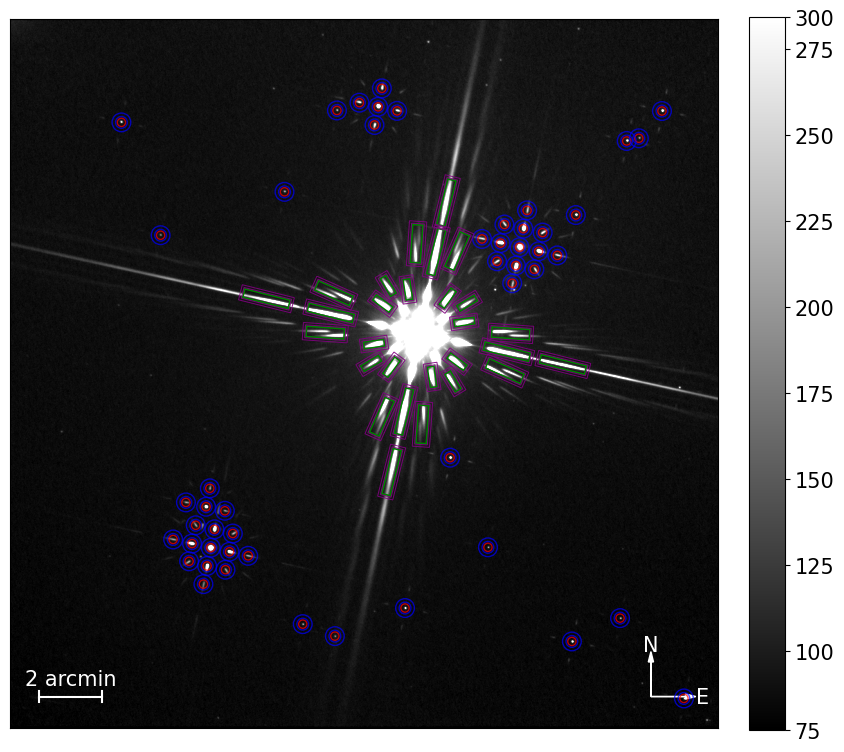

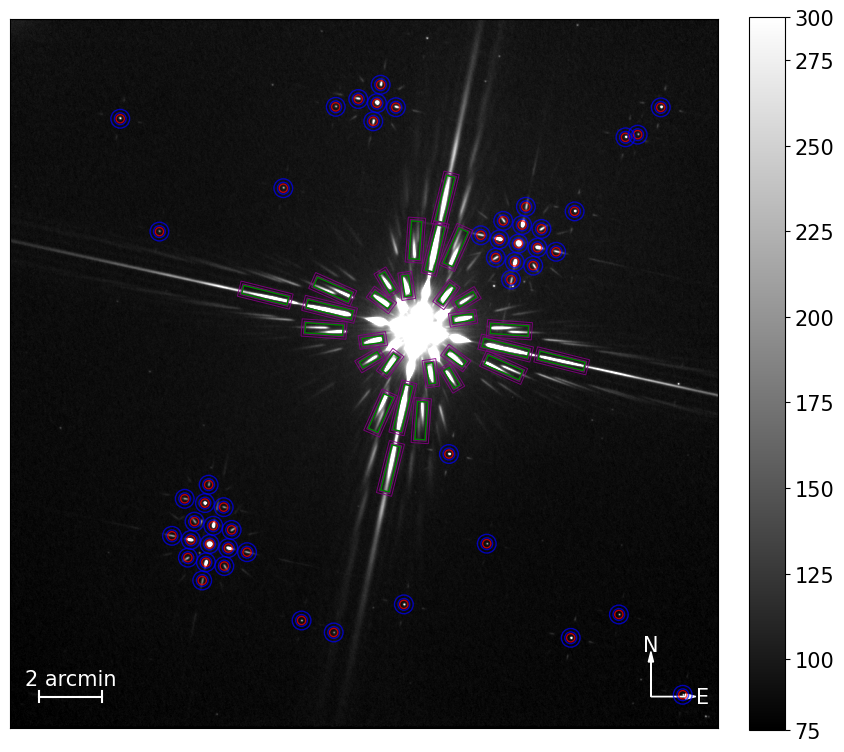

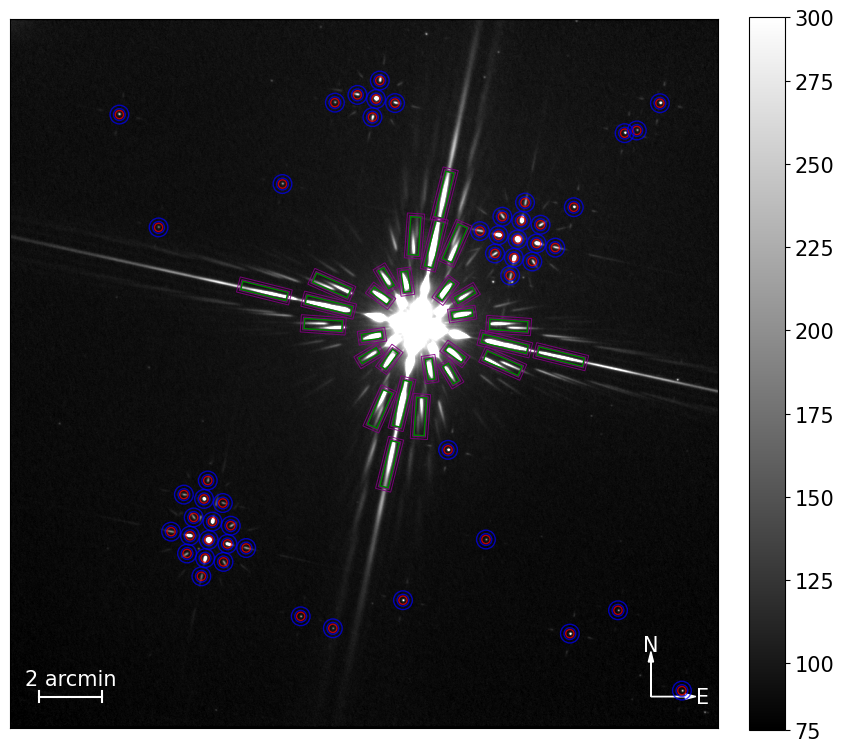

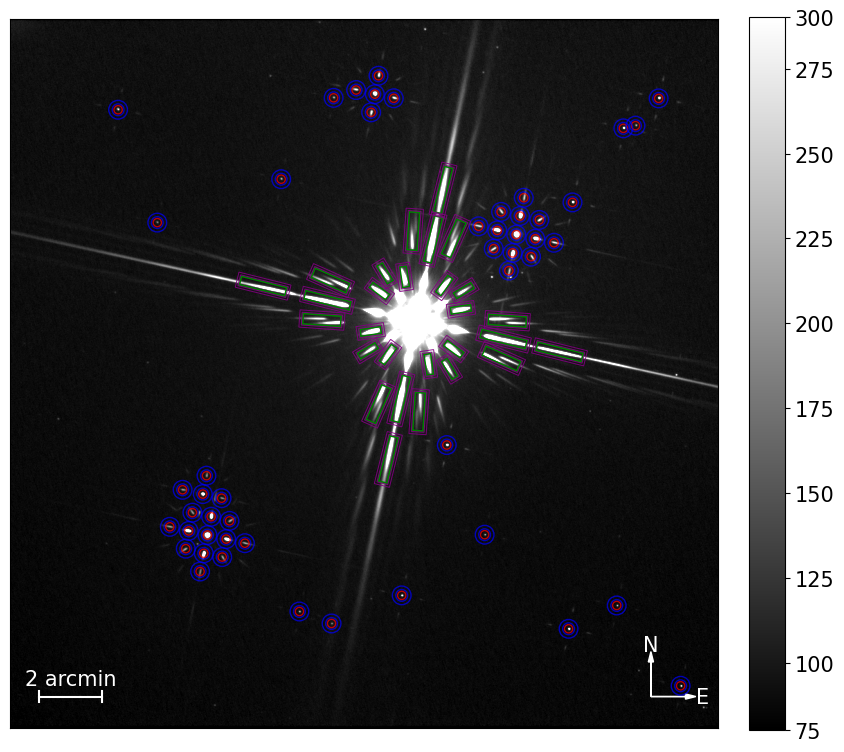

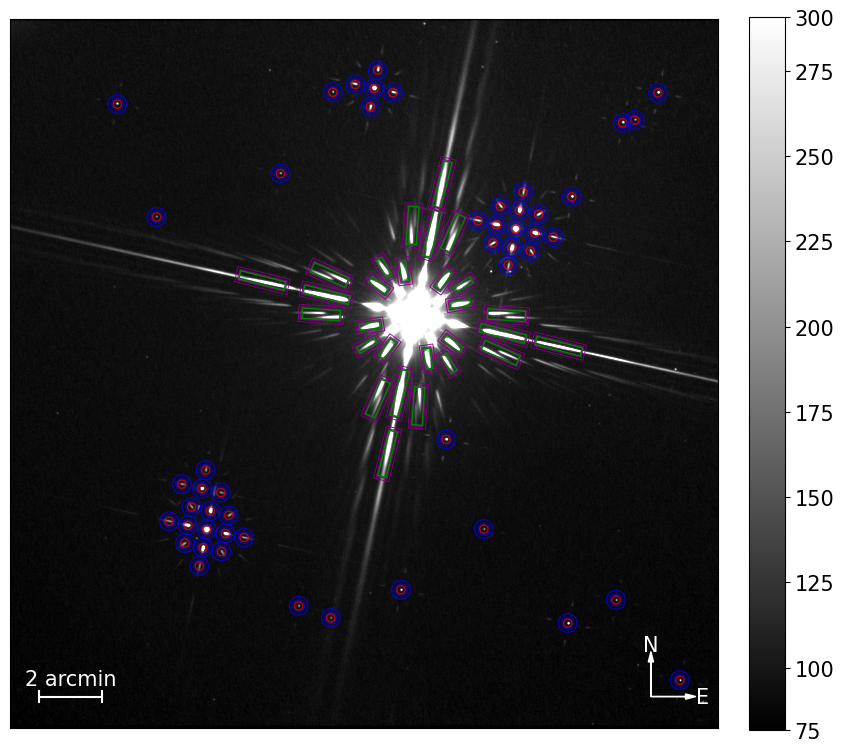

In [10]:
for i,image in enumerate (image_list_median):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    show_image(image, fig=fig, ax=ax, show_ticks=False, cmap="gray", percl=99, scale=True, north_arrow=True, east_arrow=True)
    ax.tick_params(left=False, bottom=False)
    #ax.set_title(titles[i])
    
    apertures_faint = [CircularAperture((x, y), r=r_ft) for (x, y) in pos_ft_median[i]]
    annulus_apertures_faint = [CircularAnnulus((x,y),r_in=r_ft+5, r_out=r_ft+15) for (x,y) in pos_ft_median[i]]
    for aperture in apertures_faint:
        aperture.plot(color="red", lw=1.0, alpha=0.7)
    for anulus in annulus_apertures_faint:
        anulus.plot(color="blue", lw=1.0, alpha=0.7)

    apertures_bright = [RectangularAperture(position, w=w, h=h, theta=theta) for position, theta, w, h in zip(pos_br_median[i], theta_list, w_list, h_list)]
    annuluses_bright = [RectangularAnnulus(position, w_in=w+7, w_out=w+20, h_in=h+7, h_out=h+20, theta=theta) for position, theta, w, h in zip(pos_br_median[i], theta_list, w_list, h_list)]
    for aperture in apertures_bright:
        aperture.plot(color="green", lw=1.2, alpha=1.0)
    for anulus in annuluses_bright:
        anulus.plot(color="purple", lw=0.7, alpha=0.9)